In [2]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)

df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Index,,,,,,,,,,,,,,,,,,,,,
1,1,13:17:00,1,2,2,15,9,12,10,17,...,4,0,0,0,0,0,0,0,2024-01-18,3.200000
2,1,13:18:00,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,2024-01-18,0.283333
3,1,13:19:00,1,0,0,0,0,1,0,2,...,20,0,0,0,0,0,0,0,2024-01-18,0.666667
4,1,13:20:00,1,0,0,0,4,3,0,1,...,9,0,0,0,0,0,0,0,2024-01-18,0.500000
5,1,13:21:00,1,0,0,0,3,3,0,0,...,2,0,0,0,0,0,0,0,2024-01-18,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-02-01,0.000000
20418,15,17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-02-01,0.000000
20419,15,17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-02-01,0.000000


df2:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Index,,,,,,,,,,,,,,,,,,,,,
1,1,11:04:00,1,0,0,2,2,15,0,8,...,2,0,0,0,0,0,0,0,2024-03-20,0.766667
2,1,11:05:00,1,0,0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.716667
3,1,11:06:00,1,0,0,3,1,3,0,0,...,0,0,0,0,0,0,0,0,2024-03-20,0.550000
4,1,11:07:00,1,0,0,0,1,3,0,0,...,1,0,0,0,0,0,0,0,2024-03-20,0.583333
5,1,11:08:00,1,0,0,0,1,4,0,0,...,2,0,0,0,0,0,0,0,2024-03-20,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,8,10:23:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
10041,8,10:24:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.000000
10042,8,10:25:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-27,0.233333


df3:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Index,,,,,,,,,,,,,,,,,,,,,
1,1,10:34:00,1,0,0,1,0,0,0,21,...,0,0,0,0,0,0,0,0,2024-03-07,0.466667
2,1,10:35:00,1,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,2024-03-07,0.300000
3,1,10:36:00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2024-03-07,0.216667
4,1,10:37:00,1,0,0,0,0,0,7,7,...,0,0,0,0,0,0,0,0,2024-03-07,0.483333
5,1,10:38:00,1,0,0,0,0,2,12,6,...,0,0,0,0,0,0,0,0,2024-03-07,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,7,18:54:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.083333
9082,7,18:55:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000
9083,7,18:56:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-13,0.000000


df4:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Index,,,,,,,,,,,,,,,,,,,,,
14,1,15:56:00,1,0,0,0,16,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.766667
15,1,15:57:00,1,0,0,0,8,0,0,3,...,0,0,0,0,0,0,0,0,2024-04-17,0.483333
16,1,15:58:00,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,2024-04-17,0.633333
17,1,15:59:00,1,0,0,0,15,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.533333
18,1,16:00:00,1,0,0,0,9,0,0,2,...,0,0,0,0,0,0,0,0,2024-04-17,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10036,8,14:58:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
10037,8,14:59:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000
10038,8,15:00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-04-24,0.000000


df5:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Date,Activity
Index,,,,,,,,,,,,,,,,,,,,,
19677,1,07:39:00,1,0,0,3,2,4,0,1,...,0,0,0,0,0,0,0,0,2024-05-01,0.516667
19678,1,07:40:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.283333
19679,1,07:41:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.233333
19680,1,07:42:00,1,0,0,3,0,7,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.450000
19681,1,07:43:00,1,0,0,2,0,4,0,0,...,0,0,0,0,0,0,0,0,2024-05-01,0.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29808,8,08:30:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
29809,8,08:31:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000
29810,8,08:32:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-05-08,0.000000


Error: 'Light' not found in normal_activity_data. Please check the column names.
ValueError: No non-zero activity data found.
ValueError: No non-zero activity data found.
ValueError: No non-zero activity data found.
ValueError: No non-zero activity data found.


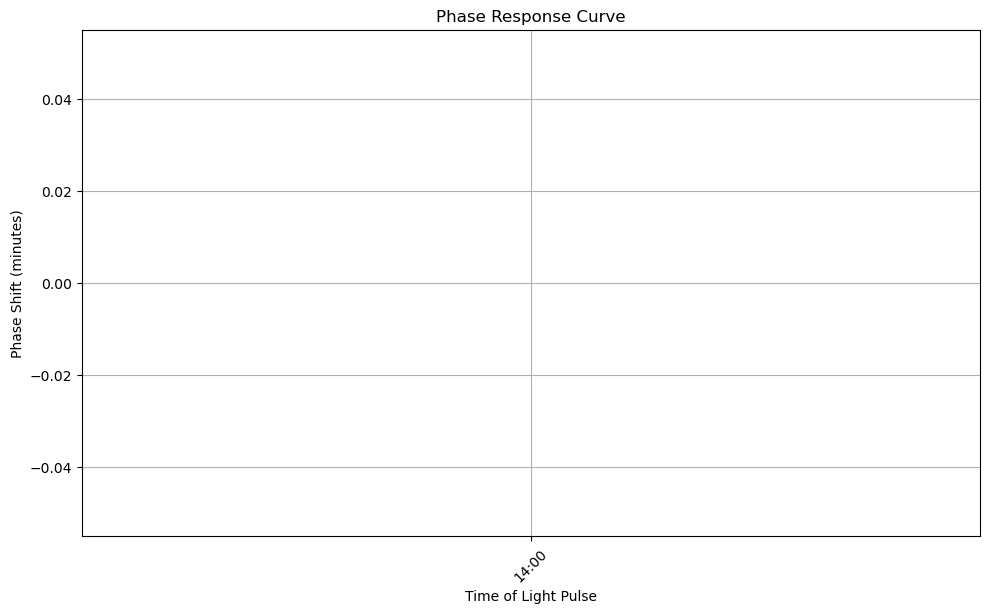

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import acf

# Function to process each data file
def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Date'] = df['Date'].dt.date  # Extract date part (year-month-day)
    df['Time'] = df['Time'].dt.time  # Extract time part (hour-minute-second)

    df = df.drop(["DateD", "DateM", "DateY", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Date'].unique())}
    df.insert(0, 'Day', df['Date'].map(day_map))
    
    # Calculate Activity (counts per minute)
    activity_cols = [col for col in df.columns if col.startswith('Sp') and col[2:].isdigit()]
    df['Activity'] = df[activity_cols].sum(axis=1) / 60.0

    return df

# Function to process all files into DataFrames
def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

# List of files to process
files = ['StA LD-DD 0118-0201-2024-Copy1.txt',
         'Steatoda A masking 02 pm.txt',
         'Steatoda A masking 10 am.txt',
         'Steatoda A masking midnight.txt',
         'Steatoda A masking 4 am.txt']

# Process all files into DataFrames
dataframes = process_files(files)

# Display each DataFrame (optional)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)

# Step 1: Calculate average activity during light and dark periods from the normal activity file
normal_activity_file = 'StA LD-DD 0118-0201-2024-Copy1.txt'

try:
    normal_activity_data = pd.read_csv(normal_activity_file, delimiter='\t')
    
    # Calculate Activity (counts per minute) if necessary
    activity_cols = [col for col in normal_activity_data.columns if col.startswith('Sp') and col[2:].isdigit()]
    normal_activity_data['Activity'] = normal_activity_data[activity_cols].sum(axis=1) / 60.0

    # Example: Calculate average activity during light and dark periods
    light_activity_avg = normal_activity_data[normal_activity_data['Light'] == 1]['Activity'].mean()
    dark_activity_avg = normal_activity_data[normal_activity_data['Light'] == 0]['Activity'].mean()

    print(f"Average Light Activity: {light_activity_avg}")
    print(f"Average Dark Activity: {dark_activity_avg}")

except FileNotFoundError:
    print(f"Error: File '{normal_activity_file}' not found.")
    exit()

except KeyError as e:
    print(f"Error: {e} not found in normal_activity_data. Please check the column names.")
    exit()

# Step 2: Calculate phase shifts for each post-light pulse activity file
post_pulse_files = ['Steatoda A masking 02 pm.txt',
                    'Steatoda A masking 10 am.txt',
                    'Steatoda A masking midnight.txt',
                    'Steatoda A masking 4 am.txt']

post_pulse_data = {}

for file in post_pulse_files:
    try:
        data = pd.read_csv(file, delimiter='\t')
        
        # Calculate Activity (counts per minute) if necessary
        activity_cols = [col for col in data.columns if col.startswith('Sp') and col[2:].isdigit()]
        data['Activity'] = data[activity_cols].sum(axis=1) / 60.0
        
        post_pulse_data[file] = data
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
        continue
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
        continue

# Function to calculate phase shift based on peak activity time using ACF
def calculate_phase_shift(normal_activity_data, post_pulse_data):
    try:
        # Clean data: Handle NaNs or zeros in 'Activity' column
        normal_activity_data.dropna(subset=['Activity'], inplace=True)
        post_pulse_data.dropna(subset=['Activity'], inplace=True)
        
        if normal_activity_data.empty or post_pulse_data.empty:
            raise ValueError("Activity data is empty after cleaning.")
        
        normal_activity_data = normal_activity_data[normal_activity_data['Activity'] != 0]
        post_pulse_data = post_pulse_data[post_pulse_data['Activity'] != 0]
        
        if normal_activity_data.empty or post_pulse_data.empty:
            raise ValueError("No non-zero activity data found.")
        
        # Compute ACF for normal activity data
        acf_vals = acf(normal_activity_data['Activity'], nlags=len(normal_activity_data)-1, fft=True)
        
        # Find index of the highest peak in ACF (excluding the first value which is 1.0)
        max_acf_index = np.argmax(acf_vals[1:]) + 1
        
        # Corresponding lag time (in minutes) for the highest peak
        lag_time = (max_acf_index + 1) * (normal_activity_data['Time'].iloc[1] - normal_activity_data['Time'].iloc[0]).seconds / 60.0
        
        # Find time of peak activity before light pulse
        normal_peak_time = normal_activity_data.iloc[max_acf_index]['Time']

        # Compute ACF for post-pulse activity data
        acf_vals_post = acf(post_pulse_data['Activity'], nlags=len(post_pulse_data)-1, fft=True)
        
        # Find index of the highest peak in ACF (excluding the first value which is 1.0)
        max_acf_index_post = np.argmax(acf_vals_post[1:]) + 1
        
        # Corresponding lag time (in minutes) for the highest peak
        lag_time_post = (max_acf_index_post + 1) * (post_pulse_data['Time'].iloc[1] - post_pulse_data['Time'].iloc[0]).seconds / 60.0
        
        # Find time of peak activity after light pulse
        post_pulse_peak_time = post_pulse_data.iloc[max_acf_index_post]['Time']

        # Calculate phase shift in minutes
        phase_shift = (post_pulse_peak_time - normal_peak_time).total_seconds() / 60.0

        return phase_shift

    except KeyError as e:
        print(f"Error: {e} column not found in one of the files.")
        return np.nan
    except ValueError as ve:
        print(f"ValueError: {ve}")
        return np.nan
    except Exception as e:
        print(f"Error in calculate_phase_shift: {str(e)}")
        return np.nan

# Calculate phase shifts for each post-pulse file
phase_shifts = {}

for file, data in post_pulse_data.items():
    phase_shift = calculate_phase_shift(normal_activity_data, data)
    phase_shifts[file] = phase_shift

# Step 4: Plot Phase Response Curve
# Create lists for x (times of light pulses) and y (phase shifts)
light_pulse_times = ['14:00', '10:00', '00:00', '04:00']  # Specify all time points
shift_values = [phase_shifts.get(file, np.nan) for file in post_pulse_files]

plt.figure(figsize=(10, 6))
plt.plot(light_pulse_times, shift_values, marker='o', linestyle='-', color='b')
plt.title('Phase Response Curve')
plt.xlabel('Time of Light Pulse')
plt.ylabel('Phase Shift (minutes)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

